# Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


## Step 1. Open the data file and study the general information

In [2]:
import pandas
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
from functools import reduce
import math

In [11]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In info we can see that we have 6 columns that are float64 abd 5 that are object type. 

We have 16715 rows in the dataset and 11 columns.

We're missing 2 Name values and 2 Genre values at first glance.

Almost 300 rows are missing from Year_of_Release at first glance

About half of Critic_score is missing

And we have almost the same amount of User_Score and Rating missing.

User_Score is an object but Critic_score is not? They both use numbers...what is going on here?

In [12]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We can already see some NaN in User_Score and Rating here. Super Mario Bros is from 1985 and has some missing values while Pokemon Red/Pokemon Blue from 1996 does as well. The rest of the Games are from after 2000. Maybe that has something to do with the missing values?

What is Platform Genre?

In [13]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Examining the tail though we have all the games past 2000 and all of them have NaN in Critic_Score, User_Score, and Rating...so Missing values does not have to do with how old the game is. 

A lot of 0s. These games look like they weren't sold at all...will need to explore this more in depth.

In [14]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
data.Platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Newer companies or longlasting companies

Wii, NES, GB(Game Boy), DS, SNES, GBA, 3DS, N64, GC(GameCube), WiiU - Nintendo

X360(Xbox360), XOne(Xboxone), XB(Xbox) - Microsoft

PS3, PS2, PSP, PS, PSV(Vita) - Sony

PC(Personal Computer) (This is not necessarily a game console)

Older Companies:

3DO - 3DO company

PC-FX, TG16 (TurboGrafx) - NEC

GG(GameGear), GEN(SegaGenesis), SAT(SegaSaturn), DC(DreamCast), Sega CD - Sega

2600 - Atari

WS(Wonderswan) - Bandai

NG(NeoGeo) - SNK Corporation

TurboGrafx

Looking at all this information about the gaming platforms there aren't many games released from the older platforms and the newest platforms also have less games released (Xone and PS4)

In [16]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

I see there is a 'Misc' option. So I may be able to fill nan with Misc

In [17]:
data.Genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [18]:
data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

No 0s here but there is nan

In [19]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Here there are 0 and some nan. and I see 'tbd' here as well which means to be determined. How is that possible? Well that is the issue of why User score is object type

In [20]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
data.Rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

There are only 3 RP...that is interesting. I think I may change all the nan to RP since it stands for rating pending and that may mean there is a rating somewhere out there. 

Got some nan here...what can that mean?

Well ESRB rating system was only established in 1994 and it is an North American regulatory board so if a game wasn't released in the USA that may be why it is missing values. That may be where all our nan is from.

E - Everyone

M - Mature

T - Teen

E10+ - Everyone over 10 (From 2005)

K-A - Kids to Adults until 1998 then renamed to E for Everyone

AO - Adult and Over

EC - Early Childhood

RP - Rating Pending

In [22]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


There are a lot of 0s here. The sales seems very empty 

In [23]:
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


11559 different games in the dataset, 31 different platforms, 12 different genres

Top Game Need for Speed: Most Wanted shows up 12 times in our data. Top platform is PS2 and shows up 2161 times while Action shows up 3369 times. tbd shows up 2424 for user_score and E shows up 3990 times.

Well because of tbd the user_score is treated as a categorical 


In [24]:
for i in data.columns:
    print(i, len(data[data[i]==0]))

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


Well we can see here that Japan has many more 0 sales than EU, NA, or Other.

In [25]:
for i in data.columns:
    print(i, len(data[data[i]!= 0]))

Name 16715
Platform 16715
Year_of_Release 16715
Genre 16715
NA_sales 12207
EU_sales 10845
JP_sales 6201
Other_sales 10114
Critic_Score 16715
User_Score 16715
Rating 16715


If we look at NA, EU, JP, and Other here we can see that most of the data is not 0. So it may be that some games were released and had sales in a particular region and not in another region.

## Step 2. Prepare the data

•	Replace the column names (make them lowercase).

In [26]:
data.columns = data.columns.str.lower()

In [27]:
data['name'] = data['name'].str.lower()

### Missing Values

In [28]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [29]:
data[data.isnull().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


I could understand missing scores and ratings in early years but I see that there are a few games in 2016 with missing scores. Of course those are new games in this dataset and may not have gotten any scores yet. They also have very few sales if at all.

### Checking missing values and determining what to do with name and genre

In [30]:
data.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The same two missing values in name are also missing for genre. The games didn't sell the best. Won't be too worried about these two games since they are both from 1993 and from an older platform as well.

### Checking missing values and determining what to do with year_of_release

In [31]:
missing_years = data.query('year_of_release != year_of_release')
missing_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [32]:
missing_years['total_sales'] = missing_years[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1).copy()
missing_years

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,freaky flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,hakuouki: shinsengumi kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


I see that some games have their years in them but it shows up as NaN in the year_of_release column. Very strange. It is only 269 games...We have all the sales information anyways and the highest sales from one of the games is 5.24. Is it worth it to keep these games in the dataset?

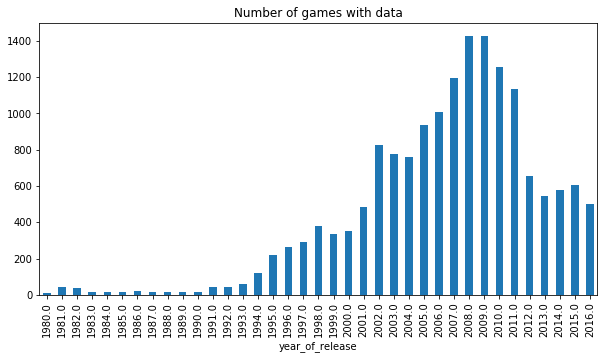

In [33]:
data.groupby(['year_of_release']).size().plot(
    kind='bar',
    title='Number of games with data',
    figsize=(10,5))

### Conclusion

I decided to keep the years as NaN because it won't affect my calculation so much. It is only 269 games and there is plenty of data to work with without these years.

### Checking missing values and determining what to do with critic_score

In [34]:
missing_critic_score = data.query('critic_score != critic_score')
missing_critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [35]:
print(data.critic_score.value_counts()/len(data))

70.0    0.015316
71.0    0.015196
75.0    0.014657
78.0    0.014358
73.0    0.014239
          ...   
20.0    0.000179
17.0    0.000060
22.0    0.000060
13.0    0.000060
21.0    0.000060
Name: critic_score, Length: 82, dtype: float64


In [36]:
median_critic_score = data['critic_score'].median()
data['critic_score'].fillna(median_critic_score, inplace=True)

In [37]:
print(data.critic_score.value_counts()/len(data))

71.0    0.528388
70.0    0.015316
75.0    0.014657
78.0    0.014358
73.0    0.014239
          ...   
20.0    0.000179
21.0    0.000060
13.0    0.000060
17.0    0.000060
22.0    0.000060
Name: critic_score, Length: 82, dtype: float64


In [38]:
data['critic_score'].isnull().sum()

0

Filled data with median and now 71 is 50% of the data.

### Conclusion

Tried to fill in missing values with genre median but that didn't seem to work. So filled with median instead.

### Checking missing values and determining what to do with user_score

In [39]:
missing_user_score = data.query('user_score != user_score')
missing_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,NaN,NaN
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,NaN,NaN
10,nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,71.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,NaN,NaN
16711,lma manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,NaN,NaN
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,NaN,NaN


In [40]:
print(data.user_score.value_counts()/len(data))

tbd    0.145019
7.8    0.019384
8      0.017350
8.2    0.016871
8.3    0.015196
         ...   
0.5    0.000120
1.9    0.000120
1.5    0.000120
0      0.000060
9.7    0.000060
Name: user_score, Length: 96, dtype: float64


tbd accounts for 15% of the data in user_score...what can we do about it?

In [41]:
data[data.user_score == 'tbd']['year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

tbd is really all over the place. 2014, 2015, 2016 there isn't that many. There is none from 1997 down...older games have a rating? That's weird. Ratings did not really start until 1994. But most of the tbd ratings are after 2000.

In [42]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [43]:
data['user_score'] = data['user_score'].astype(float)

In [44]:
median_user_score = data['user_score'].median()
data['user_score'].fillna(median_user_score, inplace=True)

In order to make calculations later I needed to make tbd something other than tbd. I made it NaN so I could change the user score to numerical. And then I will place median in the rest of the missing values.

In [45]:
print(data.user_score.value_counts()/len(data))

7.5    0.560933
7.8    0.019384
8.0    0.017350
8.2    0.016871
8.3    0.015196
         ...   
9.6    0.000120
0.6    0.000120
1.9    0.000120
9.7    0.000060
0.0    0.000060
Name: user_score, Length: 95, dtype: float64


Well I filled in with median and now 7.5 is 56% of the data

In [46]:
data['user_score'].isnull().sum()

0

### Conclusion

Filled data with median. I also changed TBD to NaN

### Checking missing values for rating and determining what to do about it

In [47]:
print(data.rating.value_counts()/len(data))

E       0.238708
T       0.177146
M       0.093509
E10+    0.084954
EC      0.000479
K-A     0.000179
RP      0.000179
AO      0.000060
Name: rating, dtype: float64


In [48]:
data[data.rating.isna()]['year_of_release'].value_counts()

2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     62
1981.0     46
1991.0     41
1992.0     41
1982.0     36
1986.0     21
1989.0     17
1983.0     17
1987.0     16
1990.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: year_of_release, dtype: int64

I could assume that up to 1994 there were no ratings yet but what accounts for the other missing values? 

In [49]:
data[data.rating == 'E10+']['year_of_release'].value_counts()

2009.0    194
2008.0    183
2007.0    164
2011.0    150
2010.0    147
2006.0    133
2005.0    102
2014.0     84
2013.0     67
2012.0     54
2015.0     51
2016.0     50
2004.0     10
2003.0      3
1988.0      1
Name: year_of_release, dtype: int64

Weird that 1988, 2003, and 2004 games got an E10+ when its rating was only from 2005 

### Conclusion

Didn't fill ratings here either. Thought to fill with RP but that would make RP very strong percentage

###   General Conclusion:

I hope my filling in missing values didn't mess up the data. We don't having anything missing in sales columns necessarily except that there are a lot of 0s in the sales there and sales is one of the more important pieces of the analysis. 

### Total Sales for Column

In [50]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

In [51]:
data.nlargest(5, ['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38


Older platforms seem to have bigger total sales... these games at least. Nintendo did well but after 2010 didn't really release a platform. in the same capacity that Sony and Microsoft started to do.

In [52]:
data.nsmallest(5, ['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,g1 jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.0,0.0,71.0,7.5,NaN,0.00
16709,score international baja 1000: the official game,PS2,2008.0,Racing,0.00,0.00,0.0,0.0,71.0,7.5,NaN,0.00
15384,order of war,PC,2009.0,Strategy,0.00,0.01,0.0,0.0,69.0,7.3,T,0.01
15486,arslan: the warriors of legend,XOne,2016.0,Action,0.01,0.00,0.0,0.0,71.0,5.8,T,0.01
15499,motocross mania 3,XB,2005.0,Racing,0.01,0.00,0.0,0.0,38.0,3.6,T,0.01


These games are all from newer consoles or companies. Sony and Microsoft are newer players to the console so that may explain this.

## Step 3. Analyze the data

•	Look at how many games were released in different years. Is the data for every period significant?

•	Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

•	Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

•	Work only with the data that you've decided is relevant. Disregard the data for previous years.
•	Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

•	Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

•	Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

•	Keeping your conclusions in mind, compare the sales of the same games on other platforms.

•	Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?


#### Look at how many games were released in different years. Is the data for every period significant?

In [53]:
data_periods = data[['year_of_release', 'name']].groupby('year_of_release').count().sort_values(by = 'year_of_release').reset_index()

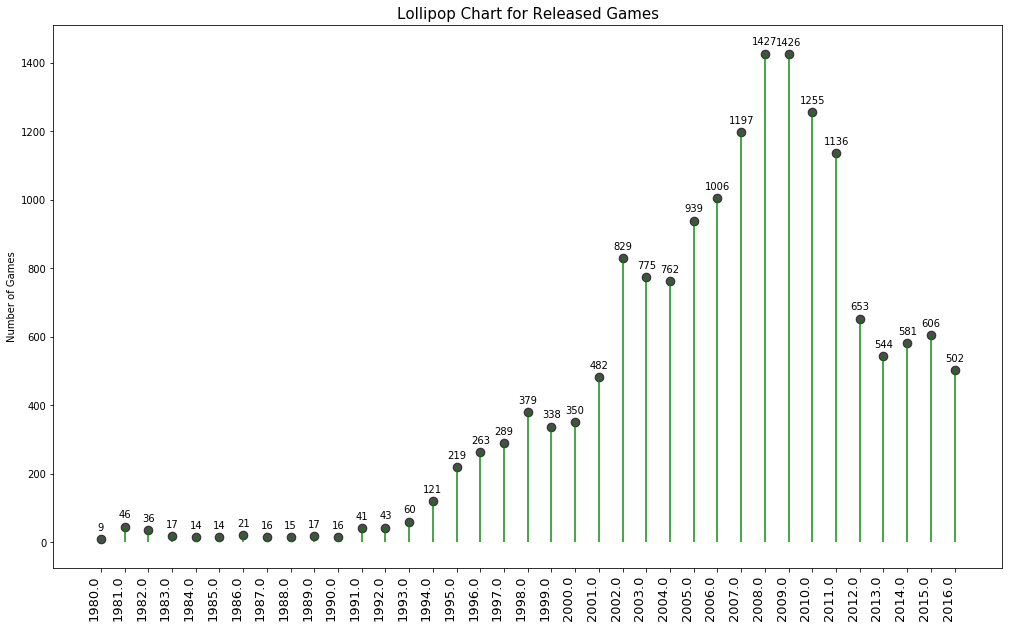

In [54]:
fig, ax =plt.subplots(figsize=(17,10))
ax.vlines(x=data_periods.year_of_release, ymin=0,ymax=data_periods.name, color='green',alpha=0.7,linewidth=2)
ax.scatter(x=data_periods.year_of_release, y=data_periods.name,s=75,color='black',alpha=0.7)

ax.set_title('Lollipop Chart for Released Games', fontdict={'size':15})
ax.set_ylabel('Number of Games')
ax.set_xticks(data_periods.year_of_release)
ax.set_xticklabels(data_periods.year_of_release,rotation=90, fontdict={'horizontalalignment':'right','size':13})

for row in data_periods.itertuples():
    ax.text(row.year_of_release, row.name+20, s=round(row.name,2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)

Years 2008 and 2009 have the largest amount of games released. Games rose from 2001 and then took a dive after 2009. Of course as I stated previously ESRB ratings did not really start until 1994. So that is most definitely why there starts to be a rise there. Also some games are rereleased...maybe those are the ones that have ratings but were released before 1994. Looks like the best option would be to take from the year 2011 where we see the dip of games to work on the research

#### Look at how sales varied from platform to platform. 
Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

Find platforms that used to be popular but now have zero sales. 

How long does it generally take for new platforms to appear and old ones to fade?

In [55]:
data_platforms = data[['platform', 'total_sales']].groupby('platform').sum().sort_values(by = 'total_sales').reset_index()

In [56]:
data_platforms

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


So There is a significant jump from Gameboy Advance to Playstation in total sales. So my cutoff point will be from there. I will take the PS, DS, Wii, PS2, X360, and PS2 for my analysis here. 

Finding the Z-score to distribution of each year

In [57]:
data['sales_z'] = (data['total_sales']-data['total_sales'].mean()/data['total_sales'].std())

In [58]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_z
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,82.195487
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24,39.895487
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,35.175487
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,32.425487
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38,31.035487


In [59]:
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_z
16710,samurai warriors: sanada maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,71.0,7.5,NaN,0.01,-0.334513
16711,lma manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,71.0,7.5,NaN,0.01,-0.334513
16712,haitaka no psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,71.0,7.5,NaN,0.01,-0.334513
16713,spirits & spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,71.0,7.5,NaN,0.01,-0.334513
16714,winning post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,71.0,7.5,NaN,0.01,-0.334513


In [60]:
data['colors'] = ['red' if x < 0 else 'green' for x in data['sales_z']]

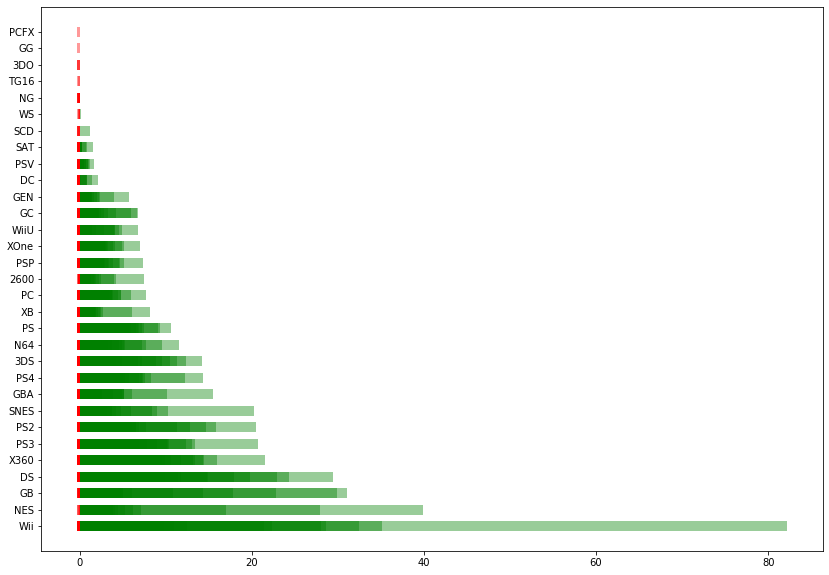

In [61]:
# Draw plot
plt.figure(figsize=(14,10))
plt.hlines(y=data.platform, xmin=0, xmax=data.sales_z, color=data.colors, alpha=0.4, linewidth=10)

# Decorations
#plt.gca().set(ylabel='Games', xlabel='Sales')
#plt.yticks(data.platform, data.total_sales, fontsize=12)
#plt.title('Diverging Bars of Game Sales', fontdict={'size':20})
#plt.grid(alpha=0.5)

Looks like Nintendo with Wii, NES, GB, and DS was successful for a while and has the longest bars but it also has been around the longest in our data and years than any of the other companies. We can see X360, PS3 and PS2, PS4 creeping up.

#### Find platforms that used to be popular but now have zero sales.

In [62]:
popular_zero = pd.pivot_table(data, index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum', fill_value = 0)

In [63]:
dynamics_1 =popular_zero-popular_zero.shift(+1) 
dynamics_1.head(37)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,24.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982.0,-6.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983.0,-23.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984.0,-5.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985.0,0.18,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986.0,0.22,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987.0,1.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988.0,-1.20,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


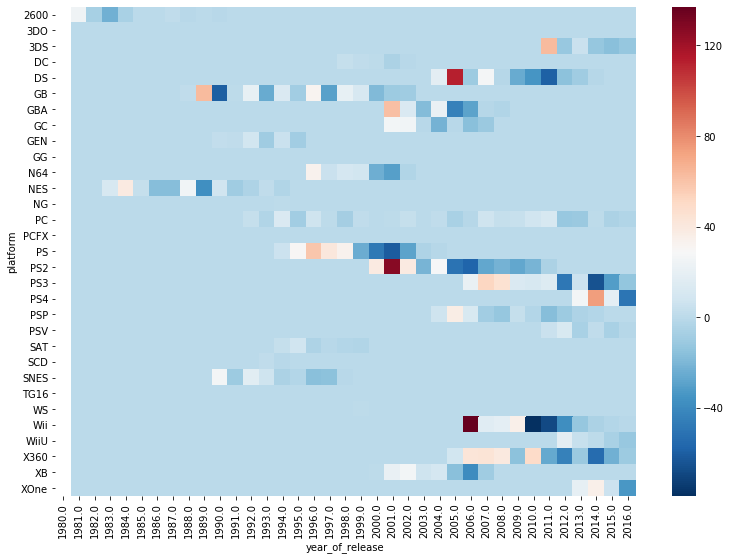

In [64]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics_1.T, cmap="RdBu_r")

You can see from this graph where no sales were happening with light blue and when sales started for some of the platforms with darker red. Wii, DS, PS2 seem to be popular. PS4, X360, GBA, and 3DS as well.

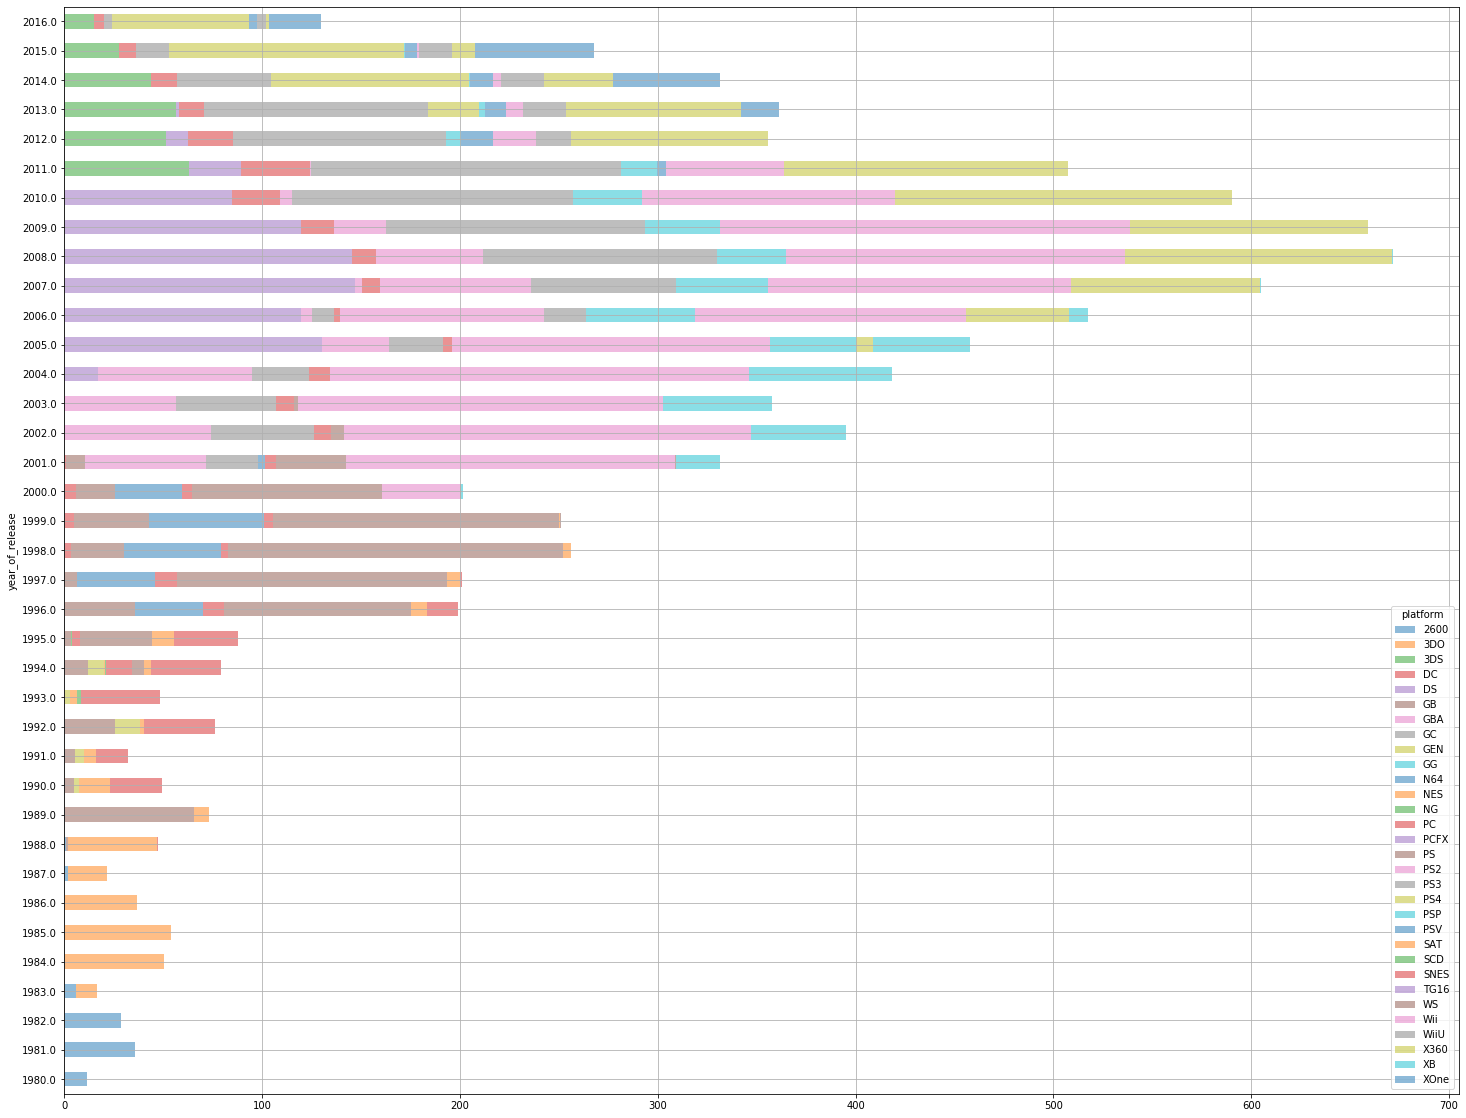

In [72]:
data.pivot_table(index=data['year_of_release'], columns='platform',
                                      values='total_sales'
                                      , aggfunc='sum').plot(kind='barh', stacked='False', alpha=0.5, grid=True, figsize=(25,20))

Problem with this graph is the colors are similar. But it still tells a nice story. Based on what I know about when the game systems are during the years I can see it pretty well. 

### Conclusion

I can see that the NES was popular back in the 80s and GB going into the 90s. But towards the 2000s I see the DS, PS, PSP, Wii, PS2 having zero sales now. I see that once a new model is introduced it takes about 5 years for a platform to fade completely. You can especially see that with the PS2 and PS3 to the PS4 models

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

Based on what I have stated I will take data from 2011 since the new platforms will be easier to analyse than the older systems. And the older systems don't even have sales. 

In [65]:
data_cut_years=data[data.year_of_release>2010]

#### Which platforms are leading in sales? 

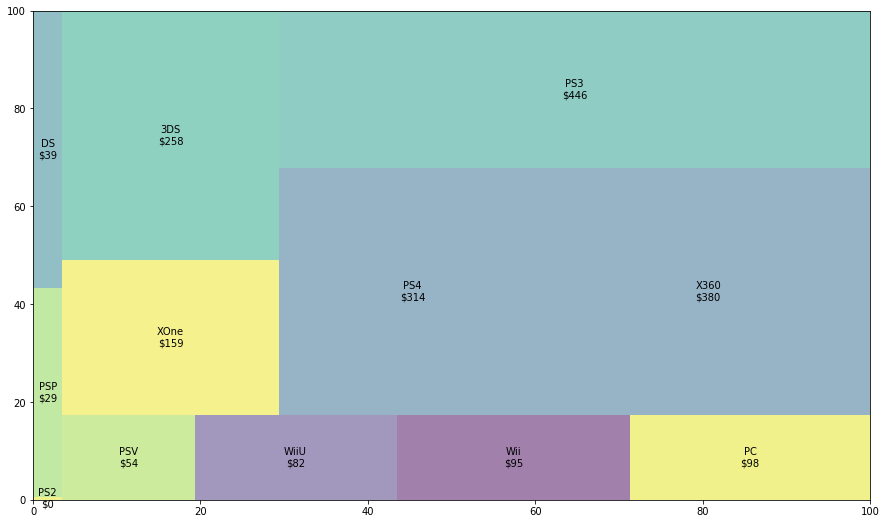

In [70]:
!pip install squarify
import squarify

data_platforms_tree = data_cut_years[['platform', 'total_sales']].groupby('platform').sum().sort_values(by = 'total_sales').reset_index()
data_platforms_tree = data_platforms_tree[data_platforms_tree['total_sales'] != 0]
#creating sizes for graph
sizes=data_platforms_tree.total_sales.values.tolist()
#creating labels for graph
labels=data_platforms_tree.apply(lambda x: str(x[0]) +"\n"+"$"+str(round(x[1])),axis = 1)
plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes,label=labels,alpha=.5)

Looks like PS3, X360, and PS4 are leading in sales with 3DS and XOne behind them. This makes sense because we are seeing a transition from X360 to XOne here and the PS3 to PS4. It seems Sony is doing well in general. I wonder if we saw the sales of the Switch in this dat if we would see a drop in 3DS much more significantly.

#### Which ones are growing or shrinking? Select several potentially profitable platforms.

In [71]:
data_new_year=pd.pivot_table(data_cut_years, index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum', fill_value = 0)

In [72]:
#Finding out difference between each year
dynamics =data_new_year-data_new_year.shift(+1) 
dynamics.tail()

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2012.0,-11.84,-15.17,-11.81,-0.45,-49.42,0.00,-10.13,11.56,-37.94,17.56,-44.10,0.00
2013.0,5.21,-9.47,-10.84,0.00,5.89,25.99,-4.55,-5.60,-13.12,4.09,-11.16,18.96
2014.0,-12.81,-1.54,0.90,0.00,-65.49,74.01,-2.90,1.31,-4.84,0.38,-53.84,35.11
2015.0,-15.98,0.00,-4.76,0.00,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016.0,-12.64,0.00,-3.27,0.00,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


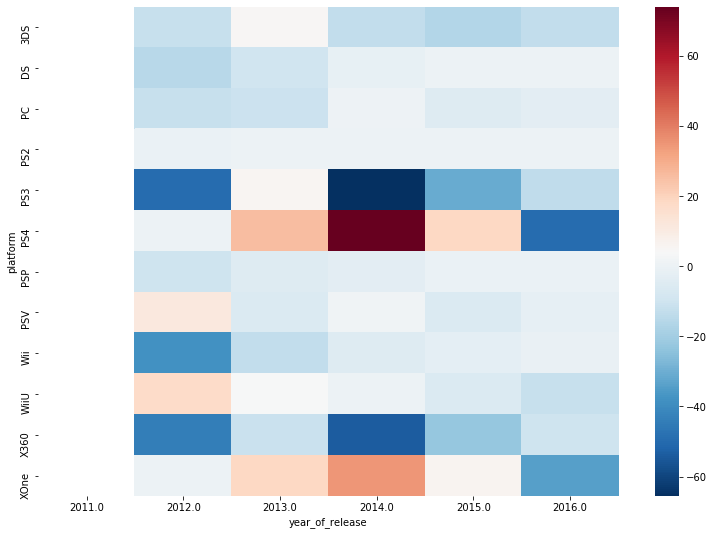

In [73]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics.T, cmap="RdBu_r")

Don't see any platforms that are potentially profitable. All seem to be shrinking or not growing yet. But the PS4 and XOne are the newest and X360 and PS3 are still being used but are tranisitioning out.

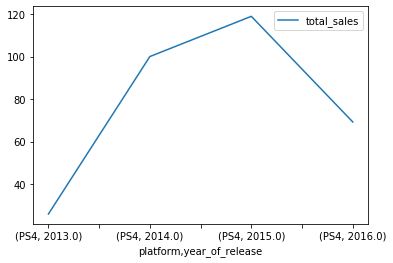

In [74]:
PS4_pivot=(data.query('platform == "PS4"').pivot_table(index=('platform','year_of_release'), values='total_sales', aggfunc='sum'))
PS4_pivot.plot()

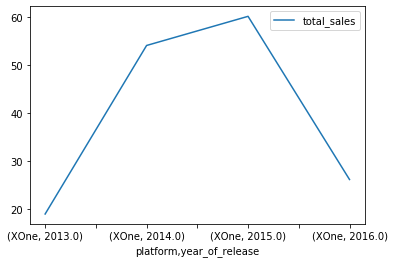

In [76]:
XOne_pivot=(data.query('platform == "XOne"').pivot_table(index=('platform','year_of_release'), values='total_sales', aggfunc='sum'))
XOne_pivot.plot()

PS4 has more sales than Xbox One but they both had a nice rise but are now falling almost after 4 years.

### Moved the section of bar graphs and conclusions here

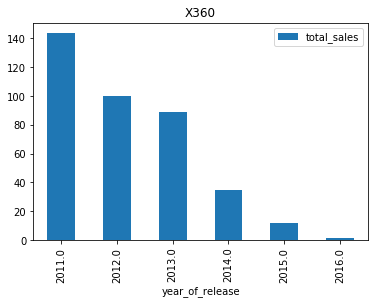

In [88]:
data_cut_years[data_cut_years['platform']=='X360'].groupby('year_of_release').sum().reset_index().plot(x='year_of_release', y='total_sales', kind='bar', title='X360')

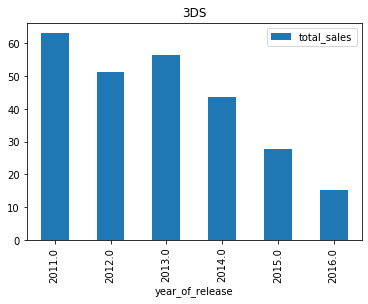

In [89]:
data_cut_years[data_cut_years['platform']=='3DS'].groupby('year_of_release').sum().reset_index().plot(x='year_of_release', y='total_sales', kind='bar', title='3DS')

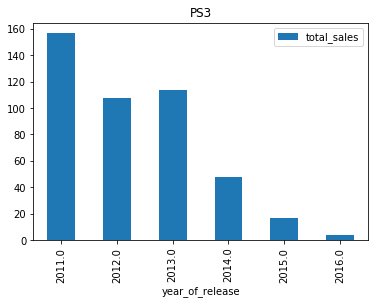

In [90]:
data_cut_years[data_cut_years['platform']=='PS3'].groupby('year_of_release').sum().reset_index().plot(x='year_of_release', y='total_sales', kind='bar', title='PS3')

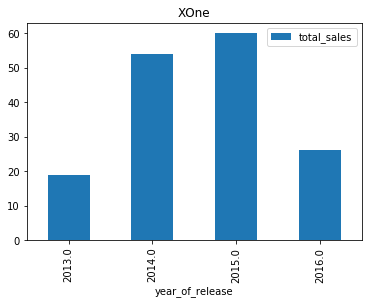

In [91]:
data_cut_years[data_cut_years['platform']=='XOne'].groupby('year_of_release').sum().reset_index().plot(x='year_of_release', y='total_sales', kind='bar', title='XOne')

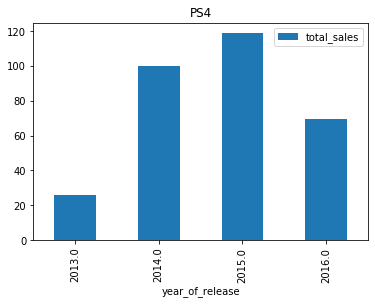

In [92]:
data_cut_years[data_cut_years['platform']=='PS4'].groupby('year_of_release').sum().reset_index().plot(x='year_of_release', y='total_sales', kind='bar', title='PS4')

In [93]:
data_notx360=data_cut_years.query('platform != "X360"')

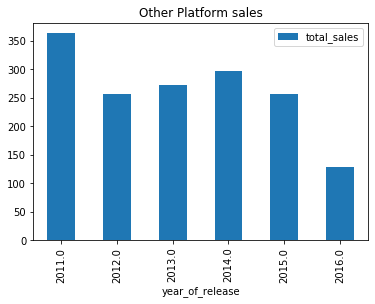

In [94]:
data_notx360.groupby('year_of_release').sum().reset_index().plot(x='year_of_release', y='total_sales', kind='bar', title='Other Platform sales')

### Conclusion
It looks like sales for X360 were strong in 2011 and then started dwindling until it dropped pretty much in 2016. Compared to other platforms like 3DS and PS3 it looks similar. But the newer platforms of PS4 and Xone are still pretty strong. Of course PS4 is made more total sales at 120 maximum whereas Xone only made 60 maximum. The X360 and PS3 are probably most similar models. Seems that the PS3 wins in total sales but they are both shrinking at about the same way each year.

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [77]:
grouped=data_cut_years.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

In [78]:
ordered=grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

In [79]:
ordered

0      PS2
1      PSP
2       DS
3      PSV
4     WiiU
5      Wii
6       PC
7     XOne
8      3DS
9      PS4
10    X360
11     PS3
Name: platform, dtype: object

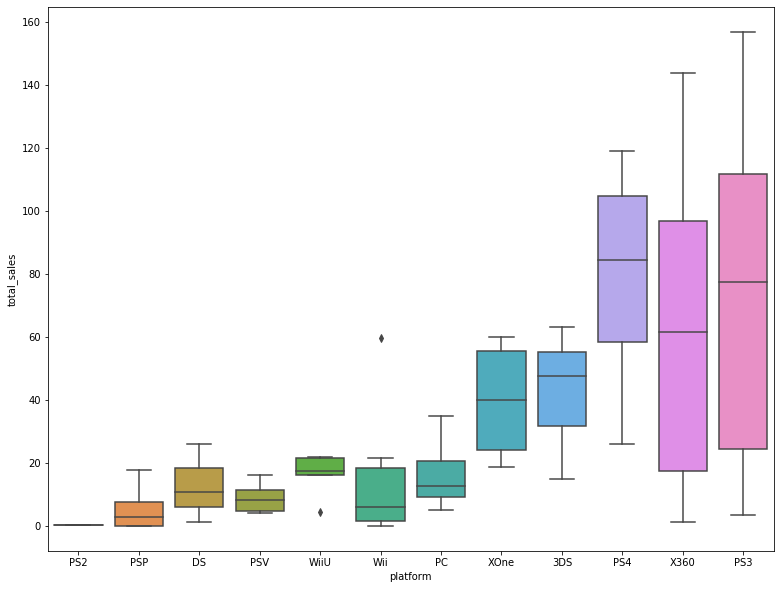

In [80]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales', data=grouped, order=ordered)

So the difference in sales is pretty significant. The 3 top platforms PS4, PS3 and X360 are the latest platforms. Wii is Nintendo. PS and XOne are Sony and Microsoft and they are clearly winning in the platform business. We can see that PS4 and XOne are behind X360 and PS3 but they are the newer models. Probably because they have not been out for so long.

In [90]:
data_PS3=data_cut_years.query('platform == "PS3"')

In [91]:
data_x360=data_cut_years.query('platform == "X360"')

In [92]:
data_PS3.groupby('platform')['total_sales'].mean()

platform
PS3    0.629336
Name: total_sales, dtype: float64

In [93]:
data_x360.groupby('platform')['total_sales'].mean()

platform
X360    0.763815
Name: total_sales, dtype: float64

The average sales of X360 is a bit higher than the PS3 during this time period

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

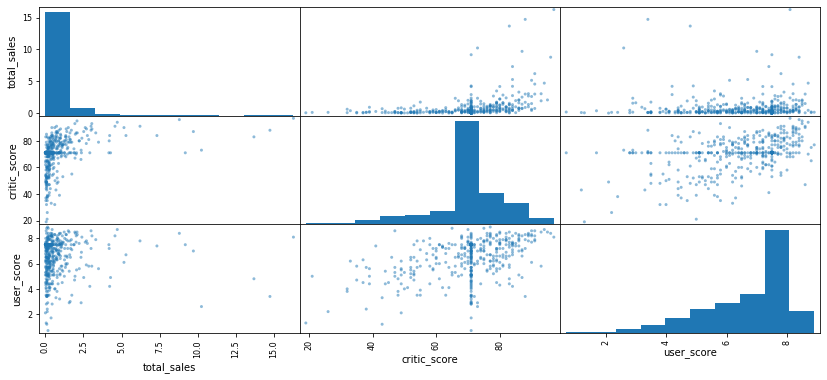

In [94]:
pd.plotting.scatter_matrix(data_x360[['total_sales', 'critic_score', 'user_score']],figsize=[14,6])
plt.show()

Well you can clearly see the median that I added for missing value...straight line.

In [95]:
print('Correlation coefficient for Sales vs. critic_score: {:.1f}'.format(data_x360['total_sales'].corr(data_x360['critic_score'])))

Correlation coefficient for Sales vs. critic_score: 0.3


Well there seems to be a weak correlation here of sales with critic score

In [96]:
print('Correlation coefficient for Sales vs. user_score: {:.1f}'.format(data_x360['total_sales'].corr(data_x360['user_score'])))

Correlation coefficient for Sales vs. user_score: -0.0


Looks like the user_score is even weaker correlation to sales

### Conclusion

Seems there is no correlation between sales and user_score or critic_score. And even with the median straight line in both scores I see that the critic_score and user_score have a smiliar build up

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [97]:
data_cut_years['name'].unique()

array(['grand theft auto v', 'call of duty: modern warfare 3',
       'call of duty: black ops 3', ..., 'strawberry nauts',
       'aiyoku no eustia', 'haitaka no psychedelica'], dtype=object)

In [98]:
multi_platform_gta = data_cut_years.query('name == "grand theft auto v"')
multi_platform_gta

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_z,colors
16,grand theft auto v,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,20.705487,green
23,grand theft auto v,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,15.925487,green
42,grand theft auto v,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,12.275487,green
165,grand theft auto v,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,5.125487,green
1730,grand theft auto v,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17,0.825487,green


In [99]:
multi_platform_cod=data_cut_years.query('name == "call of duty: modern warfare 3"')
multi_platform_cod

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_z,colors
29,call of duty: modern warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,14.385487,green
37,call of duty: modern warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33,12.985487,green
1040,call of duty: modern warfare 3,PC,2011.0,Shooter,0.41,0.98,0.00,0.32,78.0,2.5,M,1.71,1.365487,green
2500,call of duty: modern warfare 3,Wii,2011.0,Shooter,0.55,0.20,0.00,0.08,70.0,1.8,M,0.83,0.485487,green


In [100]:
multi_platform_codbo=data_cut_years.query('name =="call of duty: black ops 3"')
multi_platform_codbo

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,sales_z,colors
31,call of duty: black ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,71.0,7.5,NaN,14.63,14.285487,green
99,call of duty: black ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,71.0,7.5,NaN,7.39,7.045487,green
1049,call of duty: black ops 3,X360,2015.0,Shooter,1.14,0.40,0.00,0.16,71.0,7.5,NaN,1.70,1.355487,green
1062,call of duty: black ops 3,PS3,2015.0,Shooter,0.49,0.87,0.07,0.26,71.0,7.5,NaN,1.69,1.345487,green
6463,call of duty: black ops 3,PC,2015.0,Shooter,0.00,0.25,0.00,0.01,71.0,7.5,NaN,0.26,-0.084513,red


### New Conclusion based on games
We can see from these three games that were launched on multiple platforms that PS3 and X360 led in sales with the first two games of GTA and COD. The third game which is a new COD game and released in 2015 sees the use of the newest platforms of PS4 and XOne. PS4 is clearly leading in the sales whereas people were still using the older platforms with GTA so the sales for X360 and PS3 are larger. Once people started making the switch to the newer platforms you see the sales start rising there in 2015. The consoles that were switched out are X360 and PS3 which still have sales but not as much. 

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [95]:
grouped_genres=data_cut_years.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()
grouped_genres

,genre,total_sales
0,Puzzle,9.85
1,Strategy,22.16
2,Adventure,45.04
3,Simulation,50.26
4,Fighting,66.90
5,Racing,88.31
6,Platform,88.68
7,Misc,139.42
8,Sports,237.15
9,Role-Playing,245.63


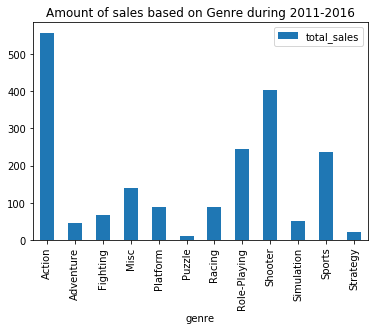

In [96]:
data_cut_years.groupby('genre').sum().reset_index().plot(x='genre', y='total_sales', kind='bar', title='Amount of sales based on Genre during 2011-2016')

In [97]:
grouped_genres1=data.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()
grouped_genres1

,genre,total_sales
0,Strategy,174.23
1,Adventure,237.59
2,Puzzle,242.57
3,Simulation,389.97
4,Fighting,447.53
5,Racing,728.67
6,Misc,802.51
7,Platform,827.77
8,Role-Playing,934.56
9,Shooter,1052.45


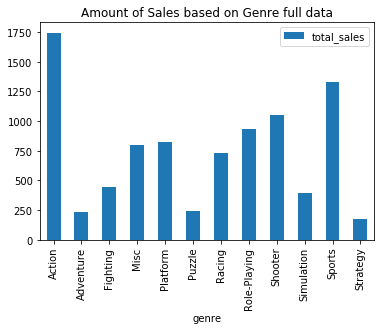

In [98]:
data.groupby('genre').sum().reset_index().plot(x='genre', y='total_sales', kind='bar', title='Amount of Sales based on Genre full data')

### Conclusion


Well it looks like the Action genre is clearly the winner here at 557 during the years 0f 2011-2016 and 1750 for all the years.
Shooters are starting to get more popular it seems where Sports overall is the second most sales. It seems that most people want to be active with there games and simulatons, strategy and puzzle games which are much less active and much more about thinking than just playing have the least sales

## Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:

•	The top five platforms. Describe variations in their market shares from region to region.

•	The top five genres. Explain the difference.

•	Do ESRB ratings affect sales in individual regions?


## North America

#### The top five platforms. Describe variations in their market shares from region to region.

In [99]:
na_platform_sales=data_cut_years.groupby(['platform'])['na_sales'].sum().sort_values().reset_index()

In [100]:
na_platform_sales.tail()

,platform,na_sales
7,3DS,82.65
8,XOne,93.12
9,PS4,108.74
10,PS3,168.26
11,X360,226.80


The top 5 platforms in sales in North America are X360, PS3, PS4, XOne, and 3DS.

#### The top five genres. Explain the difference.

In [101]:
na_genre=data_cut_years.groupby(['genre'])['total_sales'].sum().sort_values().reset_index()

In [102]:
na_genre.tail()

,genre,total_sales
7,Misc,139.42
8,Sports,237.15
9,Role-Playing,245.63
10,Shooter,402.91
11,Action,557.80


The top 5 genres are Action, Shooter, Role-Playing, Sports, and Misc.

## Europe

#### The top five platforms. Describe variations in their market shares from region to region.

In [103]:
eu_platform_sales=data_cut_years.groupby(['platform'])['eu_sales'].sum().sort_values().reset_index()
eu_platform_sales.tail()

,platform,eu_sales
7,PC,56.70
8,3DS,61.27
9,X360,117.10
10,PS4,141.09
11,PS3,163.10


The tope 5 platforms in sales in Europe are PS3, PS4, X360, 3DS, and PC. The XOne is not in the top five in Europe

#### The top five genres. Explain the difference.

In [104]:
eu_genre=data_cut_years.groupby(['genre'])['eu_sales'].sum().sort_values().reset_index()
eu_genre.tail()

,genre,eu_sales
7,Racing,40.58
8,Role-Playing,62.30
9,Sports,88.48
10,Shooter,148.02
11,Action,199.12


The top five genres in Europe are Action, Shooter, Sports, Role-Playing, and Racing. Misc is not in the top five in Europe.

## Japan

#### The top five platforms. Describe variations in their market shares from region to region.

In [105]:
jp_platform_sales=data_cut_years.groupby(['platform'])['jp_sales'].sum().sort_values().reset_index()
jp_platform_sales.tail()

,platform,jp_sales
7,PS4,15.96
8,PSV,21.84
9,PSP,24.04
10,PS3,49.39
11,3DS,100.62


The top five platforms in Japan are 3DS, PS3, PSP, PSV, and PS4. The Xbox and PC are not within the top five here.

#### The top five genres. Explain the difference.

In [106]:
jp_genre=data_cut_years.groupby(['genre'])['jp_sales'].sum().sort_values().reset_index()
jp_genre.tail()

,genre,jp_sales
7,Platform,12.13
8,Fighting,12.38
9,Misc,17.60
10,Action,63.62
11,Role-Playing,79.87


The top five genres in Japan are Role-Playing, Action, Misc, Fighting, and Platform. Neither sports or racing or shooter is here.

### Do ESRB ratings affect sales in individual regions?

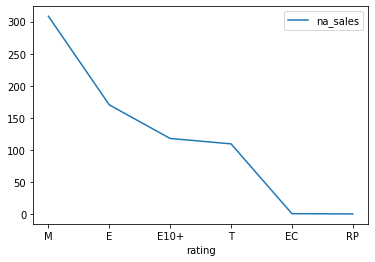

In [107]:
platforms_na_pivot=data_cut_years.pivot_table(index=('rating'), values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
platforms_na_pivot.plot()

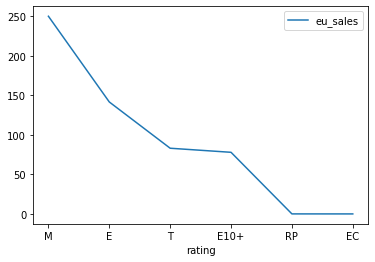

In [108]:
platforms_eu_pivot=data_cut_years.pivot_table(index=('rating'), values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
platforms_eu_pivot.plot()

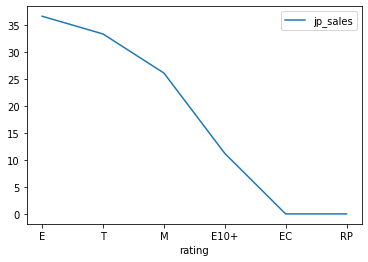

In [109]:
platforms_jp_pivot=data_cut_years.pivot_table(index=('rating'), values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
platforms_jp_pivot.plot()

### Conclusion

Yes. The rating does affect sales in certain regions. Japan is much more inclined towards E and T whereas North America and Europe are more inclined towards E and M. Of course I have a lot of games in the data that are NaN so this is not exactly a good picture but I think even if they were filled in the data I would still see Japan keeping to less mature games. 

#### Conclusion on User profile

Microsoft is an NA company and Sony and Nintendo is a Japanese company. That explains why Playstation and 3DS do well in Japan and Xbox is doing well in North America. Europe seems in the to be starting to lean towards Sony but still favors Microsoft as well. Though the PC creeps in there because that is a general platform not owned by any corporation.

The North American user and European user tend towards action and shooters and sports. The soccer leagues, American Football, Baseball, and Basketball are more popular in North America and Europe. Japan only acquired guns later in history. They are much more into fighting...Sumo Wrestling and are leaders in role playing games. That is why there is the difference in the top five in the different regions.

ESRB ratings also show that a user from Japan is much more inclined to play a game that is for Everyone than Mature. Which may also explain how the Action and Shooter genres for Japan aren't as high in sales.

## Step 5. Test the following hypotheses:


### Average user ratings of the Xbox One and PC platforms are the same.

In [110]:
data_xone = data[data.platform=='XOne']

In [111]:
data_pc = data[data.platform=='PC']

In [112]:
data_xone.user_score.mean()

6.778947368421049

In [113]:
data_pc.user_score.mean()

7.15410677618071

In [114]:
# Testing hypothesis of: Average user ratings of the Xbox One and PC platforms are the same.

list_XOne = data_xone['user_score']
list_pc = data_pc['user_score']

alpha = 0.05 

results = results = st.ttest_ind(list_XOne, list_pc, equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.00010123955107193582
We reject the null hypothesis


We reject the null hypothesis. The average user ratings of Xbox One and PC platforms are not the same. They are different platforms completely. One is a console and the other is a personal computer. I don't think a personal computer fits in any of this conversation really and we should be talking exclusively about consoles

### Average user ratings for the Action and Sports genres are different.

In [115]:
data_action= data.query('genre == "Action"')

In [116]:
data_sports= data.query('genre == "Sports"')

In [117]:
# Testing hypothesis of: Average user ratings for the Action and Sports genres are different.

list_action = data_action['user_score']
list_sports = data_sports['user_score']

alpha = 0.05 


results = st.ttest_ind(list_action, list_sports)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.7131417795320426
We can't reject the null hypothesis


71% chance that the action and sports genres are different. So we can't reject the null hypothesis. Well I agree with that. Having played games and knowing what the action and sports genres consist of...those games are not at all similar. So being a user myself I don't think the average user ratings would be the same at all. Of course we can't be 100% percent sure only 71% sure that this is the case.

### Updated conclusion

The p-value is showing that there is a 71% chance that this hypothesis will be accurate out of 100 times testing the hypothesis and this is why we can't reject the null hypothesis.

The null hypothesis is actually saying that there is no difference between Action and Sports genres user ratings and that they are equal. SO the fact that we can't reject the null hypothesis actually means that there is a 71% chance that they are equal. The hypothesis that we were testing for (are different) is actually the alternative hypothesis. So therefore the user ratings for action and sports are most probably equal to each other. And actually after thinking about it a bit more. Sports is Action...especially American Football, or skiing, etc. You are doing actions in the game...so they aren't all quite different for each other. And most probably user ratings will be similar most of the time. So we cannot reject the null hypothesis.

## Step 6. Write a general conclusion

After going through the data from the beginning we can see that we are missing a lot of the ratings for the games. And ESRB ratings are fairly new only starting after our data. This may have affected the analysis about ratings but the sales were pretty clear to see.

We took the data of the years of 2011-2016 realizing that most of the companies that we had are defunct and do not have any recent sales to analyze. We were able to pinpoint the leading platforms at this time X360 and PS3. The other leading platforms Xbox One and PS4 are still newer platforms and probably have another good year in them before a switch to a new platform by the companies.

In general there are 3 big contenders in the coming year for games on platforms. Microsoft with Xbox platforms, Sony with Playstation platforms and Nintendo with its platforms. 

By looking at the trajectory of sales we can see that at this point platforms last for about 4 years before starting to shrink sales. This may be because new platforms are being released by the same companies every few years. Like PS to PS2 to PS3 to PS4 and Xbox to Xbox One.

Japan has much better sales with Nintendo and Sony because those are corporations there whereas NA is bigger for Xbox because it has Microsoft there. EU is in the middle of both and actually does well with PC sales which I would argue is not part of this kind of conversation. 

I would recommend for us to prepare to have a new Nintendo console launch since 3DS was the last one they had launched and if they are still in the game they will launch a new console soon. Focus on PS games in Japan and Xbox games in NA. 

I would recommend looking directly at sales and not user scores or critic scores to know which games to launch. I would also recommend that our games try to keep towards the E for everyone since all the regions buy those types of games very regularly. Sell action games to NA and EU and role playing to Japan. NA and EU are bigger markets as well.